In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.
Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

Create a chart similar to ``examples/Figure_1.png``, where we show the counts of good and bad outcomes for the ``cholesterol``, ``gluc``, ``alco``, ``active``, and ``smoke`` variables for patients with __cardio=1__ and __cardio=0__ in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.


- Normalize the data by making 0 always good and 1 always bad. If the value of ``cholesterol`` or ``gluc`` is 1, make the value 0. If the value is more than 1, make the value 1.
    
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's ``catplot()``. The dataset should be split by __'Cardio'__ so there is one chart for each ``cardio`` value. The chart should look like ``examples/Figure_1.png``.

- Clean the data. Filter out the following patient segments that represent incorrect data:

    - diastolic pressure is higher than systolic (Keep the correct data with ``(df['ap_lo'] <= df['ap_hi']))``
    - height is less than the 2.5th percentile (Keep the correct data with ``(df['height'] >= df['height'].quantile(0.025)))``
    - height is more than the 97.5th percentile
    - weight is less than the 2.5th percentile
    - weight is more than the 97.5th percentile
    
    <br>

    
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's ``heatmap()``. Mask the upper triangle. The chart should look like ``examples/Figure_2.png``.

Any time a variable is set to ``None``, make sure to set it to the correct code.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [195]:

# Import data

df = pd.read_csv('medical_examination.csv')

# Rescale height to centimeters and define the column Body Mass Index (BMI)
df['height'] = df['height']/100
_BMI = df['weight'].div(df['height']**2.)

# Add 'overweight' column

# alternative to preserve NaNs value and using column names as method of the DataFrame 
# in the file medical_examination.csv there are no missing values therefore output is the same 
# we will use the same approach in the following
# df.overweight = (df.BMI > 25).replace({'True':0, 'False':1})

df['overweight'] = (_BMI > 25).astype(int) 

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

for _col in ['gluc','cholesterol']:
    df[_col] = (df[_col] >= 2).astype(int)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values 
    # from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.


    df_cat = pd.melt(df, id_vars="cardio",
                 value_vars= ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    # You will have to rename one of the columns for the catplot to work correctly.
    # df_cat = None
    # The above part is unecessary as the regrouping is handled by the catplot function through
    # hue and col variable

    # Draw the catplot with 'sns.catplot()'
    _fig = sns.catplot(x="variable", col="cardio", hue="value", data=df_cat, kind="count")
    _fig.set_axis_labels('variable','total')

    # Get the figure for the output
    fig = _fig.fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    _cond =(df['ap_lo'] <= df['ap_hi']) & \
       (df['height'] >= df['height'].quantile(0.025)) & \
       (df['height'] <= df['height'].quantile(0.975)) & \
       (df['weight'] >= df['weight'].quantile(0.025)) & \
       (df['weight'] <= df['weight'].quantile(0.975))
       
      
    df_heat = df.loc[_cond]


    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'

    sns.heatmap(corr, mask=mask, cmap='inferno',annot=True,fmt='.1f',linewidths=1)
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


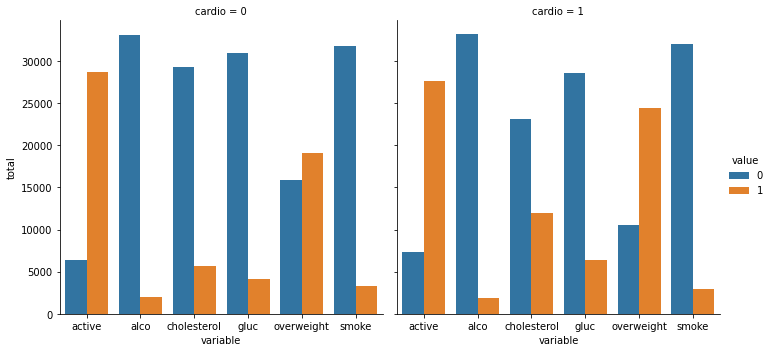

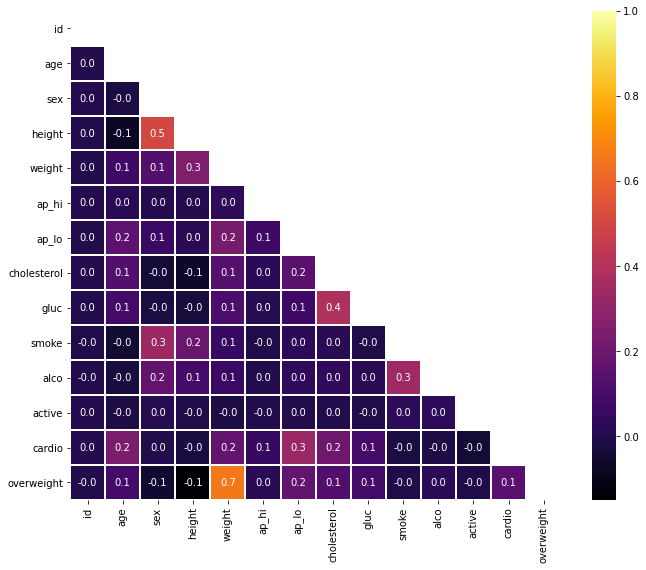

In [199]:
# Test function by calling it here
draw_cat_plot()
fig=draw_heat_map()